In [212]:
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np

NUM_QUBITS = 2
dev = qml.device("default.qubit", wires=NUM_QUBITS)
wires = list(range(NUM_QUBITS))

In [213]:
print(wires)

[0, 1]


In [214]:
def equal_superposition(wires):
    for wire in wires:
        qml.Hadamard(wires=wire)

In [215]:
@qml.qnode(dev)
def circuit():
    qml.Snapshot("Initial state")
    equal_superposition(wires)
    qml.Snapshot("After applying the Hadamard gates")
    return qml.probs(wires=wires)  # Probability of finding a computational basis state on the wires

results = qml.snapshots(circuit)()

for k, result in results.items():
    print(f"{k}: {result}")

Initial state: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
After applying the Hadamard gates: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
execution_results: [0.25 0.25 0.25 0.25]


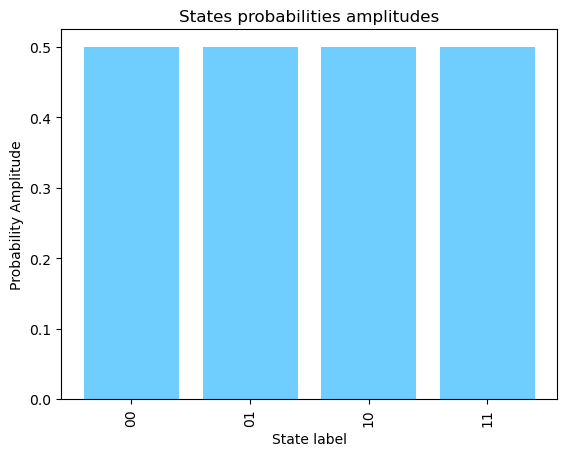

In [216]:
y = np.real(results["After applying the Hadamard gates"])
bit_strings = [f"{x:0{NUM_QUBITS}b}" for x in range(len(y))]

plt.bar(bit_strings, y, color = "#70CEFF")

plt.xticks(rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability Amplitude")
plt.title("States probabilities amplitudes")
plt.show()

In [217]:
omega = np.zeros(NUM_QUBITS)

def oracle(wires, omega):
    qml.FlipSign(omega, wires=wires)

@qml.qnode(dev)
def circuit2():
    equal_superposition(wires)
    qml.Snapshot("Before querying the Oracle")

    oracle(wires, omega)
    qml.Snapshot("After querying the Oracle")

    return qml.probs(wires=wires)

results = qml.snapshots(circuit2)()

for k, result in results.items():
    print(f"{k}: {result}")

Before querying the Oracle: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
After querying the Oracle: [-0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]
execution_results: [0.25 0.25 0.25 0.25]


In [218]:
def diffusion():
    for wire in range(NUM_QUBITS):
        qml.Hadamard(wires=wire)
        qml.PauliX(wires=wire)
    qml.ctrl(qml.PauliZ, range(NUM_QUBITS-1), control_values=np.ones(NUM_QUBITS-1))(wires=NUM_QUBITS-1)
    for wire in range(NUM_QUBITS):    
        qml.PauliX(wires=wire)
        qml.Hadamard(wires=wire)

In [219]:
@qml.qnode(dev)
def test():
    equal_superposition(wires)
    qml.Snapshot("state 1")
    oracle(wires,omega)
    qml.Snapshot("state 2")
    #qml.templates.GroverOperator(wires)
    diffusion()
    qml.Snapshot("state 3")
    return qml.state()

results = qml.snapshots(test)()

for k, result in results.items():
    print(f"{k}: {result}")

state 1: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
state 2: [-0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]
state 3: [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]
execution_results: [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]


In [220]:
@qml.qnode(dev)
def myGSA(Niter):
    equal_superposition(wires)
    for i in range(Niter):
        oracle(wires,omega)
        diffusion()
    return qml.probs()


result = np.array([])

for i in range(10):
    temp = myGSA(i)
    result = np.append(result, temp[0])


print(result)


[0.25 1.   0.25 0.25 1.   0.25 0.25 1.   0.25 0.25]
